In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Cleaning: Handling Missing Values

●	Task: Write a script that loads a CSV file into a pandas DataFrame, checks for missing values, and fills them with the mean or median of the column.


In [171]:
df = pd.read_csv("Amazon Sale Report.csv")


Show the first 5 rows of the dataset

In [173]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [174]:
# Get basic information about the dataset

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [180]:
#count of null values

In [182]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

Deleting unwanted columns

In [185]:
df = df.drop(["New","PendingS"],axis = 1)

Checking the column names

In [188]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

Standardising the column names

In [191]:
df.columns = df.columns.str.lower()

In [193]:
df.columns

Index(['index', 'order id', 'date', 'status', 'fulfilment', 'sales channel',
       'ship-service-level', 'category', 'size', 'courier status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b', 'fulfilled-by'],
      dtype='object')

In [195]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('qty', 'quantity')

In [197]:
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'category', 'size', 'courier_status', 'quantity',
       'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code',
       'ship_country', 'b2b', 'fulfilled_by'],
      dtype='object')

Checking the duplicates

In [200]:
duplicates = df[df.duplicated()]

In [202]:
duplicates.count()

index                 168
order_id              168
date                  168
status                168
fulfilment            168
sales_channel         168
ship_service_level    168
category              168
size                  168
courier_status        168
quantity              168
currency              157
amount                157
ship_city             166
ship_state            166
ship_postal_code      166
ship_country          166
b2b                   168
fulfilled_by           50
dtype: int64

Replacing the null values in other columns

In [205]:
df["fulfilled_by"].unique()

array(['Easy Ship', nan], dtype=object)

In [315]:
df['fulfilled_by'] = df["fulfilled_by"].fillna("Unknown")
df['fulfilled_by']

0         Easy Ship
1         Easy Ship
2           Unknown
3         Easy Ship
4           Unknown
            ...    
128971      Unknown
128972      Unknown
128973      Unknown
128974      Unknown
128975      Unknown
Name: fulfilled_by, Length: 128976, dtype: object

In [317]:
df.isnull().sum()

index                    0
order_id                 0
date                     0
status                   0
fulfilment               0
sales_channel            0
ship_service_level       0
category                 0
size                     0
courier_status           0
quantity                 0
currency              7800
amount                7800
ship_city               35
ship_state              35
ship_postal_code        35
ship_country            35
b2b                      0
fulfilled_by             0
dtype: int64

In [211]:
df["currency"].unique()

array(['INR', nan], dtype=object)

In [213]:
df['ship_country'].unique()

array(['IN', nan], dtype=object)

In [319]:
df["currency"] = df["currency"].fillna("INR")
df["currency"]

0         INR
1         INR
2         INR
3         INR
4         INR
         ... 
128971    INR
128972    INR
128973    INR
128974    INR
128975    INR
Name: currency, Length: 128976, dtype: object

In [321]:
df.isnull().sum()

index                    0
order_id                 0
date                     0
status                   0
fulfilment               0
sales_channel            0
ship_service_level       0
category                 0
size                     0
courier_status           0
quantity                 0
currency                 0
amount                7800
ship_city               35
ship_state              35
ship_postal_code        35
ship_country            35
b2b                      0
fulfilled_by             0
dtype: int64

In [220]:
#df[df["ship_city"].isnull()]

In [323]:
df["ship_city"].mode()

0    BENGALURU
Name: ship_city, dtype: object

In [325]:
df["ship_state"].mode()

0    MAHARASHTRA
Name: ship_state, dtype: object

In [327]:
df["ship_postal_code"].mode()

0    201301.0
Name: ship_postal_code, dtype: float64

In [329]:
df_cleaned = df.dropna(subset = ["ship_city", "ship_state","ship_postal_code", "ship_country"])

In [234]:
#df_cleaned.info()

In [333]:
df_cleaned.groupby('quantity')['amount'].median()

quantity
0      600.95
1      603.00
2     1127.00
3     1572.00
4     2366.00
5     3835.00
8     5584.00
9         NaN
13        NaN
15        NaN
Name: amount, dtype: float64

In [335]:
median_amount_per_quantity = df_cleaned.groupby('quantity')['amount'].transform('median')
median_amount_per_quantity

0         600.95
1         603.00
2         603.00
3         600.95
4         603.00
           ...  
128971    603.00
128972    603.00
128973    603.00
128974    603.00
128975    603.00
Name: amount, Length: 128941, dtype: float64

In [337]:
df['median_amount_per_quantity'] = median_amount_per_quantity

In [375]:
df_cleaned = df_cleaned.copy()
df_cleaned['amount'] = df_cleaned['amount'].fillna(df['median_amount_per_quantity'])

In [377]:
#df_cleaned.info()

In [379]:
df_cleaned.isnull().sum()

index                 0
order_id              0
date                  0
status                0
fulfilment            0
sales_channel         0
ship_service_level    0
category              0
size                  0
courier_status        0
quantity              0
currency              0
amount                0
ship_city             0
ship_state            0
ship_postal_code      0
ship_country          0
b2b                   0
fulfilled_by          0
dtype: int64

In [381]:
median_amount = df_cleaned[df_cleaned['quantity']==8]['amount'].median()
df_cleaned.loc[df_cleaned['quantity'].isin([9,13,15]), 'amount'] = median_amount

In [383]:
df_cleaned.isnull().sum()

index                 0
order_id              0
date                  0
status                0
fulfilment            0
sales_channel         0
ship_service_level    0
category              0
size                  0
courier_status        0
quantity              0
currency              0
amount                0
ship_city             0
ship_state            0
ship_postal_code      0
ship_country          0
b2b                   0
fulfilled_by          0
dtype: int64

Summary statistics

3. Descriptive Statistics: Summary Statistics
   
●	Task: Write a script that calculates and prints the mean, median, and standard deviation for each numerical column in a dataset.


In [386]:

df_cleaned.describe()

,index,quantity,amount,ship_postal_code
count,128941.000000,128941.000000,128941.000000,128941.000000
mean,64487.286340,0.904414,645.851836,463945.677744
std,37231.274722,0.313356,273.902122,191458.488954
min,0.000000,0.000000,0.000000,110001.000000
25%,32247.000000,1.000000,459.000000,382421.000000
50%,64486.000000,1.000000,600.950000,500033.000000
75%,96731.000000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [394]:
df_cleaned['ship_postal_code'] = df_cleaned['ship_postal_code'].astype('object')


In [396]:
df_cleaned.describe()

,index,quantity,amount
count,128941.000000,128941.000000,128941.000000
mean,64487.286340,0.904414,645.851836
std,37231.274722,0.313356,273.902122
min,0.000000,0.000000,0.000000
25%,32247.000000,1.000000,459.000000
50%,64486.000000,1.000000,600.950000
75%,96731.000000,1.000000,771.000000
max,128974.000000,15.000000,5584.000000


In [398]:
df_cleaned['ship_country'].unique()

array(['IN'], dtype=object)

In [400]:
df_cleaned['ship_state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi',
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [402]:
df_cleaned['ship_state'] = df_cleaned['ship_state'].str.title()
df_cleaned['ship_state'].unique()

array(['Maharashtra', 'Karnataka', 'Puducherry', 'Tamil Nadu',
       'Uttar Pradesh', 'Chandigarh', 'Telangana', 'Andhra Pradesh',
       'Rajasthan', 'Delhi', 'Haryana', 'Assam', 'Jharkhand',
       'Chhattisgarh', 'Odisha', 'Kerala', 'Madhya Pradesh',
       'West Bengal', 'Nagaland', 'Gujarat', 'Uttarakhand', 'Bihar',
       'Jammu & Kashmir', 'Punjab', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Goa', 'Meghalaya', 'Manipur', 'Tripura',
       'Ladakh', 'Dadra And Nagar', 'Sikkim', 'Andaman & Nicobar',
       'Rajshthan', 'Nl', 'Mizoram', 'New Delhi',
       'Punjab/Mohali/Zirakpur', 'Rj', 'Orissa', 'Lakshadweep', 'Pb',
       'Apo', 'Ar', 'Pondicherry', 'Rajsthan'], dtype=object)

In [404]:
state_dict = {'Rajsthan': 'Rajasthan',
                              'Orissa':'Odisha', 
                              'Rj': 'Rajasthan', 
                              'Pb':'Punjab',
                              'Nl': 'Nagaland', 
                              'Punjab/Mohali/Zirakpur': 'Punjab',
                              'Apo': 'Andhra Pradesh', 
                              'Ar': 'Arunachal Pradesh', 
                              'Puducherry':'Pondicherry'}

In [406]:
state_dict

{'Rajsthan': 'Rajasthan',
 'Orissa': 'Odisha',
 'Rj': 'Rajasthan',
 'Pb': 'Punjab',
 'Nl': 'Nagaland',
 'Punjab/Mohali/Zirakpur': 'Punjab',
 'Apo': 'Andhra Pradesh',
 'Ar': 'Arunachal Pradesh',
 'Puducherry': 'Pondicherry'}

In [503]:
#df_cleaned = df_cleaned.copy()  
df_cleaned['ship_state'] = df_cleaned['ship_state'].replace(state_dict)


In [505]:
df_cleaned['ship_state'].unique()

array(['Maharashtra', 'Karnataka', 'Pondicherry', 'Tamil Nadu',
       'Uttar Pradesh', 'Chandigarh', 'Telangana', 'Andhra Pradesh',
       'Rajasthan', 'Delhi', 'Haryana', 'Assam', 'Jharkhand',
       'Chhattisgarh', 'Odisha', 'Kerala', 'Madhya Pradesh',
       'West Bengal', 'Nagaland', 'Gujarat', 'Uttarakhand', 'Bihar',
       'Jammu & Kashmir', 'Punjab', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Goa', 'Meghalaya', 'Manipur', 'Tripura',
       'Ladakh', 'Dadra And Nagar', 'Sikkim', 'Andaman & Nicobar',
       'Rajshthan', 'Mizoram', 'New Delhi', 'Lakshadweep'], dtype=object)

In [412]:
df_cleaned['ship_city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [414]:
#Found outliers in Quantity and Amount columns
#plt.boxplot('amount', data = df_cleaned)
#plt.title ('Finding outliers in Amount column')
#plt.show()

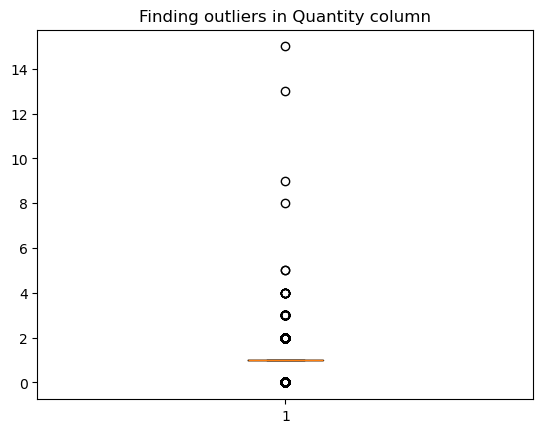

In [416]:
plt.boxplot(df_cleaned['quantity'])
plt.title ('Finding outliers in Quantity column')
plt.show()

In [418]:
df_cleaned["quantity"].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4,  8], dtype=int64)

In [420]:
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

C:\Users\padma\AppData\Local\Temp\ipykernel_41812\281843161.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])


2. Data Visualization: Plotting Histograms
●	Task: Write a script that loads a CSV file and plots histograms for all numerical columns in the dataset using matplotlib.


In [517]:

%matplotlib inline
abs_values_qty =  df_cleaned['quantity'].value_counts(ascending = False).values

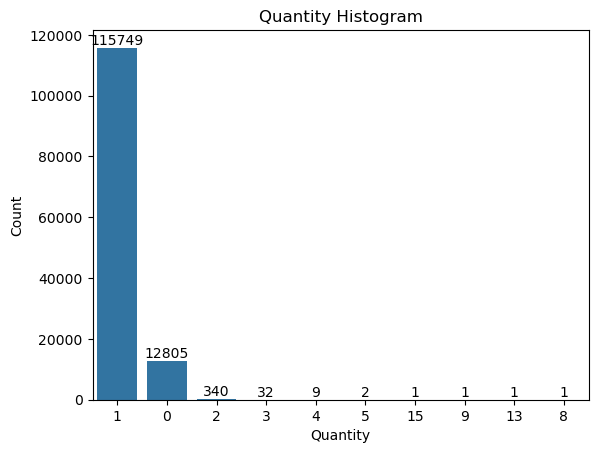

In [523]:
ax_qty = sns.countplot(x = df_cleaned['quantity'], order = df_cleaned['quantity'].value_counts(ascending = False).index)
ax_qty.bar_label(container=ax_qty.containers[0], labels=abs_values_qty)
plt.title("Quantity Histogram")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

4. Data Filtering:
  
Conditional Filtering

Task: Write a script that filters rows in a DataFrame where a specific column's value meets a certain condition (e.g., values greater than a threshold).


In [279]:
df_cleaned[df_cleaned['quantity']>10]

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,quantity,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by,state_dict
938,937,S02-5278980-4327051,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,Wallet,Free,Unshipped,15,NaN,NaN,Surat,Gujarat,394210.0,IN,False,NaN,Gujarat
3637,3636,S02-6828927-1180856,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,Shirt,XXL,Unshipped,13,NaN,NaN,Surat,Gujarat,394210.0,IN,False,NaN,Gujarat


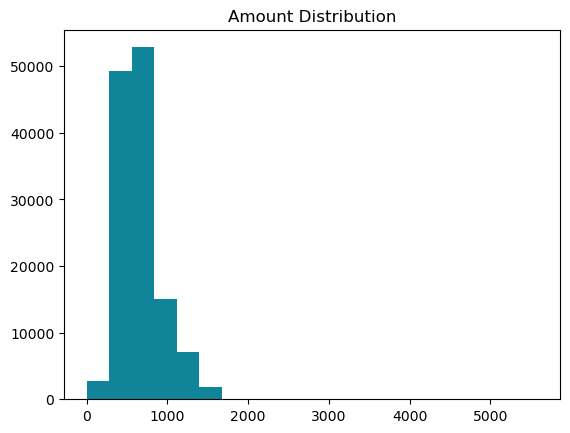

In [595]:
#plt.figure(figsize = (8,5), dpi = 100)
#counts, edges, bars = plt.hist(df_cleaned['amount'], bins = 30)
#plt.bar_label(bars)
#plt.title("Amount Histogram")
#plt.xlabel('Amount')
#plt.ylabel('Count')
#plt.show()
plt.hist(df_cleaned['amount'], bins=20, color = '#108499')
plt.title('Amount Distribution')
plt.show()

In [540]:
#counts


In [542]:
#edges

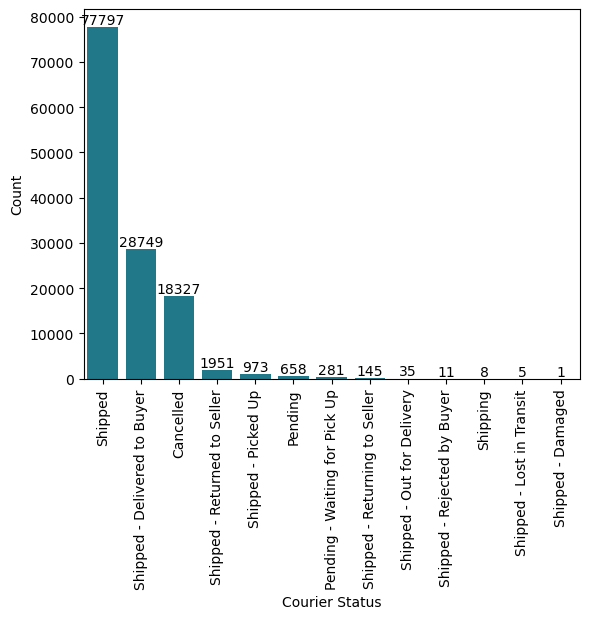

In [599]:

abs_values_status =  df_cleaned['status'].value_counts(ascending = False).values
ax_status = sns.countplot(x = df_cleaned['status'], order = df_cleaned['status'].value_counts(ascending = False).index, color = '#108499')
ax_status.bar_label(container=ax_status.containers[0], labels=abs_values_status)

plt.xlabel("Courier Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

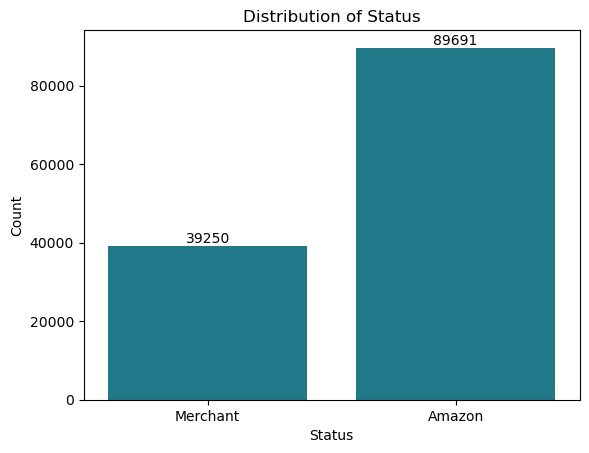

In [621]:
#4.	Fulfilment (object):
#Identifies how the order was fulfilled (e.g., Amazon Fulfillment or merchant Fulfillment).
abs_values_fulfilment = df_cleaned['fulfilment'].value_counts(ascending = True).values
ax_fulfilment = sns.countplot(x = df_cleaned['fulfilment'], order = df_cleaned['fulfilment'].value_counts(ascending = True).index, color = '#108499')
ax_fulfilment.bar_label(container = ax_fulfilment.containers[0], labels = abs_values_fulfilment)
plt.title('Distribution of Status')
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

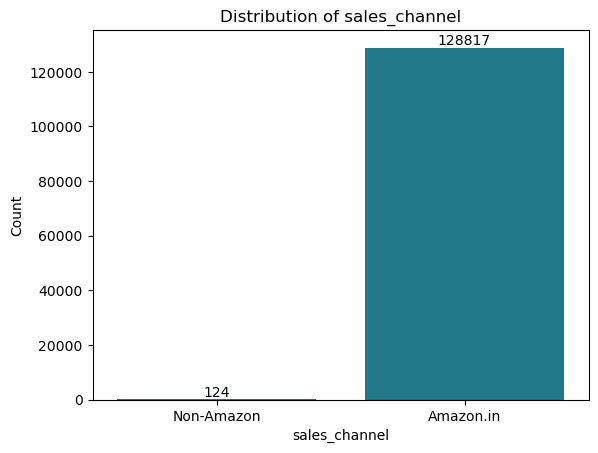

In [619]:
#5.	Sales Channel (object):
#Represents the platform through which the order was placed
abs_values_sales_channel = df_cleaned['sales_channel'].value_counts(ascending = True).values
ax_sales_channel = sns.countplot(x = df_cleaned['sales_channel'], order = df_cleaned['sales_channel'].value_counts(ascending = True).index, color = '#108499')
ax_sales_channel.bar_label(container = ax_sales_channel.containers[0], labels = abs_values_sales_channel)
plt.title('Distribution of sales_channel')
plt.xlabel("sales_channel")
plt.ylabel("Count")
plt.show()


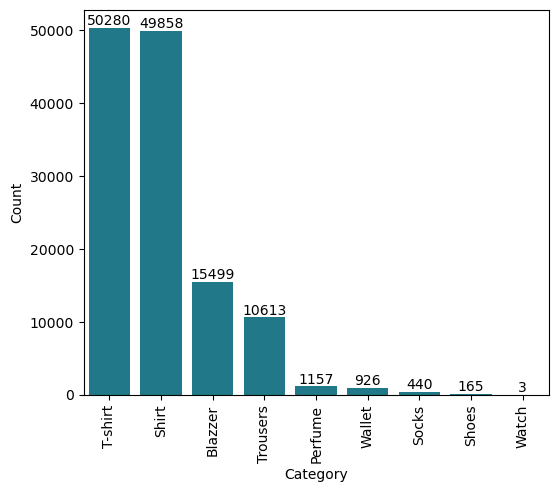

In [615]:

plt.figure(figsize = (6,5),dpi = 100)
abs_values_category =  df_cleaned['category'].value_counts(ascending = False).values
ax_category = sns.countplot(x = df_cleaned['category'], order = df_cleaned['category'].value_counts(ascending = False).index, color = '#108499')
ax_category.bar_label(container=ax_category.containers[0], labels=abs_values_category)

plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()


In [466]:
df_cleaned['courier_status'].value_counts(ascending = False).index



Index(['Shipped', 'On the Way', 'Unshipped', 'Cancelled'], dtype='object', name='courier_status')

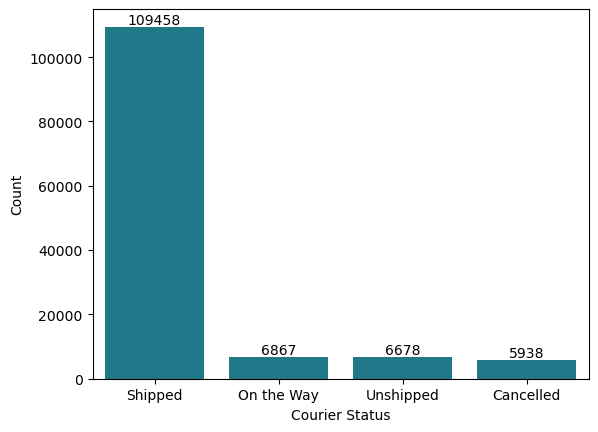

In [607]:
abs_values =  df_cleaned['courier_status'].value_counts(ascending = False).values
ax = sns.countplot(x = df_cleaned['courier_status'], order = df_cleaned['courier_status'].value_counts(ascending = False).index, color = '#108499')
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.xlabel("Courier Status")
plt.ylabel("Count")
plt.show()

In [551]:
df_cleaned.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'category', 'size', 'courier_status', 'quantity',
       'currency', 'amount', 'ship_city', 'ship_state', 'ship_postal_code',
       'ship_country', 'b2b', 'fulfilled_by', 'state_dict'],
      dtype='object')

In [437]:
df_cleaned.groupby('fulfilment')['amount'].sum()

fulfilment
Amazon      57978707.10
Merchant    25298074.45
Name: amount, dtype: float64

In [305]:
df_cleaned.groupby('fulfilment')['quantity'].sum()

fulfilment
Amazon      84077
Merchant    32539
Name: quantity, dtype: int64

In [307]:
df_cleaned.groupby('sales_channel')['amount'].sum()

sales_channel
Amazon.in     83182238.55
Non-Amazon       77791.00
Name: amount, dtype: float64

In [439]:
df_cleaned.groupby('category')['amount'].sum()

category
Blazzer     11693334.47
Perfume       829082.36
Shirt       23202462.48
Shoes         130161.31
Socks         162778.55
T-shirt     41148228.55
Trousers     5618854.70
Wallet        490964.13
Watch            915.00
Name: amount, dtype: float64

In [450]:
top_10_states_amount = df_cleaned.groupby('ship_state')['amount'].sum().sort_values(ascending = False).head(10)

In [452]:
top_10_states_amount

ship_state
Maharashtra       14054261.65
Karnataka         11041981.52
Telangana          7332077.38
Uttar Pradesh      7238602.58
Tamil Nadu         6924823.55
Delhi              4583526.51
Kerala             4084371.88
West Bengal        3757208.02
Andhra Pradesh     3443216.11
Haryana            3016170.69
Name: amount, dtype: float64

In [454]:
top_10_states_quantity = df_cleaned.groupby('ship_state')['quantity'].sum().sort_values(ascending = False).head(10)

In [456]:
top_10_states_quantity

ship_state
Maharashtra       20338
Karnataka         15901
Tamil Nadu        10416
Telangana         10253
Uttar Pradesh      9507
Delhi              6321
Kerala             5805
West Bengal        5316
Andhra Pradesh     4816
Gujarat            4142
Name: quantity, dtype: int64